# Process manipulation

The objective here is to manipulate a multivariate stochastic process $X: \Omega \times \mathcal{D} \rightarrow \mathbb{R}^d$, where $\mathcal{D} \in \mathbb{R}^n$ is discretized on the mesh $\mathcal{M}$ and exhibit some of the services exposed by the *Process* objects:

- ask for the dimension, with the method getOutputDimension
- ask for the mesh, with the method getMesh
- ask for the mesh as regular 1-d mesh, with the getTimeGrid method
- ask for a realization, with the method the getRealization method
- ask for a continuous realization, with the getContinuousRealization method
- ask for a sample of realizations, with the getSample method
- ask for the normality of the process with the isNormal method
- ask for the stationarity of the process with the isStationary method

In [1]:
from __future__ import print_function
import openturns as ot
import math as m

In [2]:
# Create a mesh which is a RegularGrid
tMin = 0.0
timeStep = 0.1
n = 100
time_grid = ot.RegularGrid(tMin, timeStep, n)
time_grid.setName('time')

In [3]:
# Create a process of dimension 3
# Normal process with an Exponential covariance model
# Amplitude and scale values of the Exponential model
scale = [4.0]
amplitude = [1.0, 2.0, 3.0]
# spatialCorrelation
spatialCorrelation = ot.CorrelationMatrix(3)
spatialCorrelation[0, 1] = 0.8
spatialCorrelation[0, 2] = 0.6
spatialCorrelation[1, 2] = 0.1
myCovarianceModel = ot.ExponentialModel(scale, amplitude, spatialCorrelation)
process = ot.GaussianProcess(myCovarianceModel, time_grid)

In [4]:
# Get the dimension d of the process
process.getOutputDimension()

3

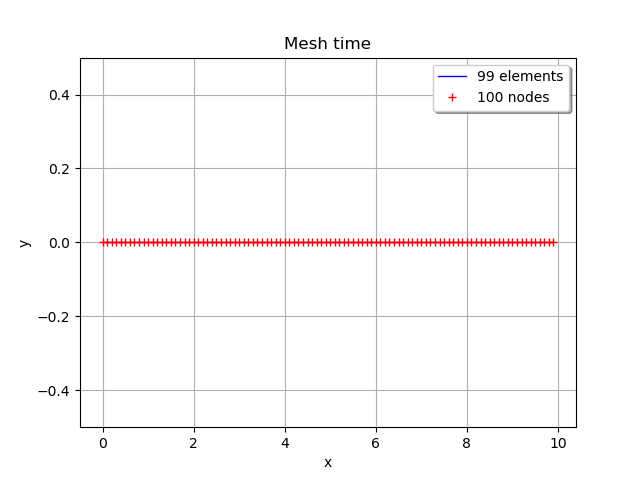

In [5]:
# Get the mesh of the process
mesh = process.getMesh()

# Get the corners of the mesh
minMesh = mesh.getVertices().getMin()[0]
maxMesh = mesh.getVertices().getMax()[0]
mesh.draw()

In [6]:
# Get the time grid of the process
# only when the mesh can be interpreted as a regular time grid
process.getTimeGrid()

class=RegularGrid name=time start=0 step=0.1 n=100

In [7]:
# Get a realisation of the process
realization = process.getRealization()
realization

class=Field name=Unnamed description=[t,y0,y1,y2] implementation=class=FieldImplementation name=Unnamed mesh=class=Mesh name=time dimension=1 vertices=class=Sample name=Unnamed implementation=class=SampleImplementation name=Unnamed size=100 dimension=1 description=[t] data=[[0],[0.1],[0.2],[0.3],[0.4],[0.5],[0.6],[0.7],[0.8],[0.9],[1],[1.1],[1.2],[1.3],[1.4],[1.5],[1.6],[1.7],[1.8],[1.9],[2],[2.1],[2.2],[2.3],[2.4],[2.5],[2.6],[2.7],[2.8],[2.9],[3],[3.1],[3.2],[3.3],[3.4],[3.5],[3.6],[3.7],[3.8],[3.9],[4],[4.1],[4.2],[4.3],[4.4],[4.5],[4.6],[4.7],[4.8],[4.9],[5],[5.1],[5.2],[5.3],[5.4],[5.5],[5.6],[5.7],[5.8],[5.9],[6],[6.1],[6.2],[6.3],[6.4],[6.5],[6.6],[6.7],[6.8],[6.9],[7],[7.1],[7.2],[7.3],[7.4],[7.5],[7.6],[7.7],[7.8],[7.9],[8],[8.1],[8.2],[8.3],[8.4],[8.5],[8.6],[8.7],[8.8],[8.9],[9],[9.1],[9.2],[9.3],[9.4],[9.5],[9.6],[9.7],[9.8],[9.9]] simplices=[[0,1],[1,2],[2,3],[3,4],[4,5],[5,6],[6,7],[7,8],[8,9],[9,10],[10,11],[11,12],[12,13],[13,14],[14,15],[15,16],[16,17],[17,18],[18,19],[19,20],[20,21],[21,22],[22,23],[23,24],[24,25],[25,26],[26,27],[27,28],[28,29],[29,30],[30,31],[31,32],[32,33],[33,34],[34,35],[35,36],[36,37],[37,38],[38,39],[39,40],[40,41],[41,42],[42,43],[43,44],[44,45],[45,46],[46,47],[47,48],[48,49],[49,50],[50,51],[51,52],[52,53],[53,54],[54,55],[55,56],[56,57],[57,58],[58,59],[59,60],[60,61],[61,62],[62,63],[63,64],[64,65],[65,66],[66,67],[67,68],[68,69],[69,70],[70,71],[71,72],[72,73],[73,74],[74,75],[75,76],[76,77],[77,78],[78,79],[79,80],[80,81],[81,82],[82,83],[83,84],[84,85],[85,86],[86,87],[87,88],[88,89],[89,90],[90,91],[91,92],[92,93],[93,94],[94,95],[95,96],[96,97],[97,98],[98,99]] values=class=Sample name=Unnamed implementation=class=SampleImplementation name=Unnamed size=100 dimension=3 description=[y0,y1,y2] data=[[0.608202,-0.546285,2.85787],[0.859404,-0.684934,4.29515],[0.759785,-0.412579,3.70743],[0.916187,-0.246828,4.21313],[0.387827,-1.38989,3.3123],[0.358203,-1.12376,2.73144],[0.225643,-1.1759,2.35896],[0.318519,-1.26445,2.63608],[0.415249,-1.09914,2.92571],[0.798614,-0.423608,3.27951],[0.619552,-0.732026,2.43396],[0.692892,-0.209648,2.2847],[0.839548,0.0459929,2.71602],[0.885061,0.258892,2.44003],[0.778628,-0.0823315,2.62694],[1.19419,0.437455,4.22729],[1.17622,0.654559,4.04395],[0.982957,0.424499,3.07548],[1.10334,0.788062,3.59701],[0.864378,0.529998,2.90991],[1.2125,0.832713,3.82455],[1.45062,1.03513,4.09552],[1.43765,0.809793,4.70298],[1.47609,0.779927,5.14242],[1.81715,1.6484,5.08157],[1.4055,1.61611,3.59935],[1.258,1.22796,3.26317],[1.34709,1.60575,2.81917],[1.28921,1.79026,2.23596],[1.05006,0.89263,2.42069],[1.09895,1.25942,2.27579],[1.05196,0.969738,2.95465],[0.973369,1.21309,2.91686],[0.75023,0.462561,2.70221],[0.782583,-0.28829,4.031],[0.485569,-0.453113,2.7522],[0.521616,-0.0880464,2.43946],[0.400922,-0.381734,2.48801],[0.353982,0.366798,1.40087],[0.480372,0.73606,0.854974],[-0.0629854,0.0431747,-0.613472],[-0.227417,-0.107349,-1.2284],[0.189045,0.610885,0.00798863],[0.0643717,0.208548,-0.063647],[-0.436024,-0.752743,-0.811578],[-0.81896,-1.54554,-1.1931],[-0.605787,-1.58635,-0.305703],[-0.311877,-1.21395,-0.229758],[-0.417775,-1.19421,-0.698939],[-0.246315,-0.972411,-0.132713],[-0.247656,-0.970011,-0.0916836],[-0.32477,-1.10456,-0.163786],[-0.360644,-1.022,-0.385138],[-0.26683,-0.830049,-0.304069],[0.0691557,0.0415887,-0.0462787],[-0.0776271,-0.226335,-0.721866],[0.183588,0.440429,-0.736439],[0.306853,0.479674,-0.693557],[0.188912,-0.120883,-0.0661199],[0.229521,-0.0712336,0.249693],[0.0908987,-0.602888,0.224829],[0.0574908,-0.520735,0.145841],[-0.278403,-1.22243,0.0404239],[-0.581997,-1.69682,-0.71162],[-0.64319,-1.23166,-1.31645],[-0.949112,-1.9399,-1.60235],[-0.833086,-1.96542,-0.767395],[-1.01272,-2.48018,-0.347459],[-0.921043,-2.18233,-0.270656],[-1.07248,-2.58454,-0.341258],[-1.26055,-3.1788,0.24186],[-1.35956,-3.76756,0.995624],[-0.657286,-2.15547,0.92984],[-0.861119,-2.24947,0.0181587],[-0.847631,-2.32293,0.104309],[-1.02003,-3.24799,0.801112],[-0.999645,-3.01668,0.5

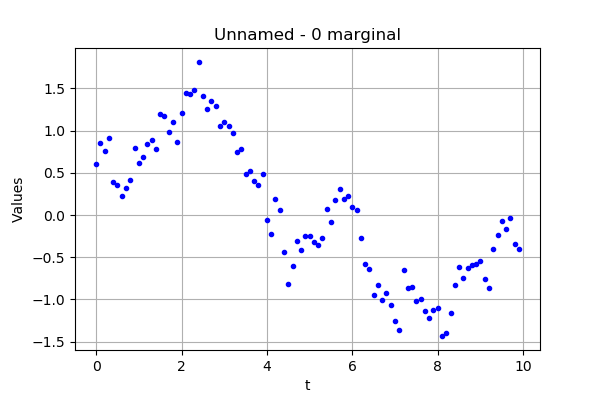

In [8]:
# Draw one realization
interpolate=False
realization.drawMarginal(0, interpolate)

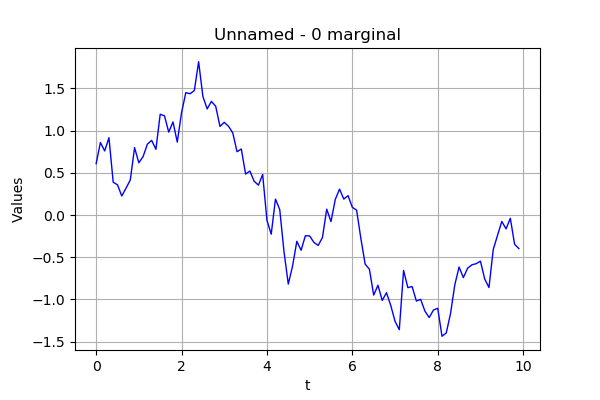

In [9]:
# Same graph, but draw interpolated values
realization.drawMarginal(0)

In [10]:
# Get a function representing the process using P1 Lagrange interpolation
# (when not defined from a functional model)
continuousRealization = process.getContinuousRealization()

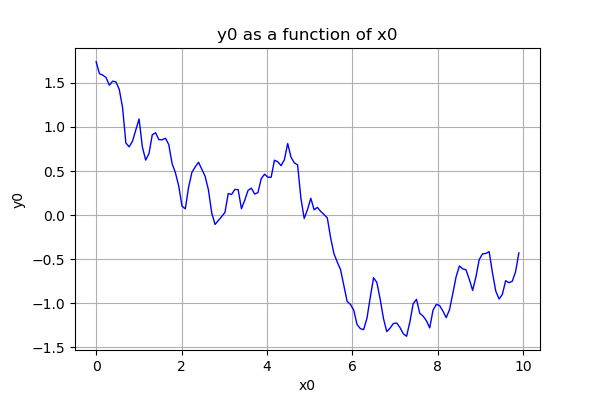

In [11]:
# Draw its first marginal
marginal0 = continuousRealization.getMarginal(0)
marginal0.draw(minMesh, maxMesh)

In [12]:
# Get several realizations of the process
number = 10
fieldSample = process.getSample(number)
fieldSample

class=ProcessSampleImplementation mesh=class=Mesh name=time dimension=1 vertices=class=Sample name=Unnamed implementation=class=SampleImplementation name=Unnamed size=100 dimension=1 description=[t] data=[[0],[0.1],[0.2],[0.3],[0.4],[0.5],[0.6],[0.7],[0.8],[0.9],[1],[1.1],[1.2],[1.3],[1.4],[1.5],[1.6],[1.7],[1.8],[1.9],[2],[2.1],[2.2],[2.3],[2.4],[2.5],[2.6],[2.7],[2.8],[2.9],[3],[3.1],[3.2],[3.3],[3.4],[3.5],[3.6],[3.7],[3.8],[3.9],[4],[4.1],[4.2],[4.3],[4.4],[4.5],[4.6],[4.7],[4.8],[4.9],[5],[5.1],[5.2],[5.3],[5.4],[5.5],[5.6],[5.7],[5.8],[5.9],[6],[6.1],[6.2],[6.3],[6.4],[6.5],[6.6],[6.7],[6.8],[6.9],[7],[7.1],[7.2],[7.3],[7.4],[7.5],[7.6],[7.7],[7.8],[7.9],[8],[8.1],[8.2],[8.3],[8.4],[8.5],[8.6],[8.7],[8.8],[8.9],[9],[9.1],[9.2],[9.3],[9.4],[9.5],[9.6],[9.7],[9.8],[9.9]] simplices=[[0,1],[1,2],[2,3],[3,4],[4,5],[5,6],[6,7],[7,8],[8,9],[9,10],[10,11],[11,12],[12,13],[13,14],[14,15],[15,16],[16,17],[17,18],[18,19],[19,20],[20,21],[21,22],[22,23],[23,24],[24,25],[25,26],[26,27],[27,28],[28,29],[29,30],[30,31],[31,32],[32,33],[33,34],[34,35],[35,36],[36,37],[37,38],[38,39],[39,40],[40,41],[41,42],[42,43],[43,44],[44,45],[45,46],[46,47],[47,48],[48,49],[49,50],[50,51],[51,52],[52,53],[53,54],[54,55],[55,56],[56,57],[57,58],[58,59],[59,60],[60,61],[61,62],[62,63],[63,64],[64,65],[65,66],[66,67],[67,68],[68,69],[69,70],[70,71],[71,72],[72,73],[73,74],[74,75],[75,76],[76,77],[77,78],[78,79],[79,80],[80,81],[81,82],[82,83],[83,84],[84,85],[85,86],[86,87],[87,88],[88,89],[89,90],[90,91],[91,92],[92,93],[93,94],[94,95],[95,96],[96,97],[97,98],[98,99]] values=[class=Sample name=Unnamed implementation=class=SampleImplementation name=Unnamed size=100 dimension=3 description=[y0,y1,y2] data=[[0.956583,0.864101,2.82472],[0.964759,1.01278,2.70028],[1.06075,1.11367,3.34847],[1.17141,0.599701,5.00748],[1.16832,1.12782,4.09084],[1.4156,1.36472,4.37028],[1.20061,1.19425,3.74054],[0.789641,0.536491,2.98827],[0.790684,0.29745,3.19322],[0.911322,0.263238,3.3957],[0.913051,0.519995,2.58829],[0.715916,0.648217,1.34622],[1.10445,1.20493,1.97189],[0.940828,1.29795,1.28735],[0.999603,1.75945,0.257684],[1.2181,2.23325,0.044136],[1.24941,2.4422,0.230175],[1.11568,1.78215,0.725941],[0.871571,0.930413,0.852621],[0.728102,0.549128,0.736729],[0.883244,0.9369,0.691168],[0.714345,0.764019,0.821203],[0.65614,0.718439,0.534453],[0.69653,0.446523,0.940382],[0.516623,-0.0809735,1.1752],[1.20163,0.966402,3.01936],[0.82323,0.542609,2.49095],[1.11232,1.32799,2.99107],[1.31736,1.76423,3.30771],[1.24695,1.85243,2.49273],[0.822802,1.25029,1.7238],[0.788732,1.77501,1.04847],[0.817826,1.79063,0.918954],[0.992306,1.71813,1.17214],[0.972873,1.40814,2.11918],[1.00757,1.49801,2.07794],[1.26653,1.85923,2.62496],[1.23916,1.825,2.49376],[1.22474,1.48456,3.17736],[0.892462,0.533591,3.28634],[1.04205,0.862566,3.53816],[1.18567,1.05174,3.53504],[0.993992,0.728831,3.15577],[0.740533,0.19285,2.56215],[0.541199,-0.136385,1.65052],[0.212437,-0.161385,0.546045],[0.0409669,-0.504082,-0.605537],[-0.0573127,-0.747872,-0.891575],[-0.229048,-0.921026,-1.92472],[-0.202809,-1.04379,-1.77995],[-0.296947,-1.16685,-2.37713],[-0.533816,-1.55097,-2.25505],[-0.462414,-1.05563,-2.78416],[-0.60918,-1.08237,-2.95702],[-0.612907,-1.06986,-3.14039],[-0.990957,-1.72027,-4.01955],[-0.691179,-1.00398,-4.29927],[-0.799259,-1.17833,-4.30842],[-0.698672,-0.97174,-4.71352],[-0.775313,-1.24252,-4.12762],[-1.00231,-1.83423,-4.55581],[-0.982039,-1.43763,-4.89348],[-1.17896,-1.66923,-5.72392],[-0.94531,-0.954834,-5.10123],[-0.938548,-1.09825,-4.39913],[-0.720488,-0.689208,-3.96705],[-0.710812,-0.580178,-3.83726],[-0.412329,0.394906,-4.26791],[-0.497234,0.387611,-4.48117],[-0.744622,0.207823,-5.31859],[-0.646906,0.714659,-6.02462],[-0.373446,0.663099,-4.55405],[-0.304168,0.629593,-4.32134],[0.298284,2.03494,-3.90496],[0.214632,1.89105,-3.92714],[0.0749531,1.92822,-4.10044],[0.0449253,1.43208,-3.66349],[-0.0723741,1.17117,-3.67152],[0.221629,1.82222,-3.40614],[-0.0904343,1.24254,-3.91695],[-0.528857,0.478695,-5.0252

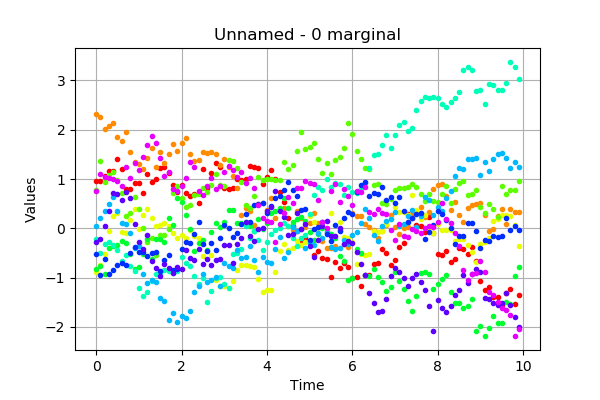

In [13]:
# Draw a sample of the process 
fieldSample.drawMarginal(0, False)

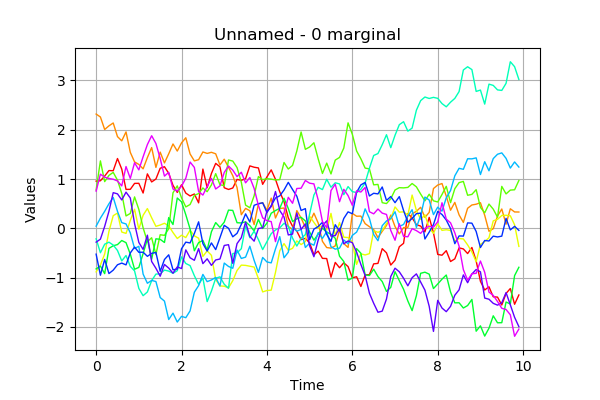

In [14]:
# Same graph, but draw interpolated values
fieldSample.drawMarginal(0)

In [15]:
# Get the marginal of the process at index 1
# Care! Numerotation begins at 0
# Not yet implemented for some processes
process.getMarginal([1])

class=Process implementation=class=GaussianProcess mesh=class=Mesh name=time dimension=1 vertices=class=Sample name=Unnamed implementation=class=SampleImplementation name=Unnamed size=100 dimension=1 description=[t] data=[[0],[0.1],[0.2],[0.3],[0.4],[0.5],[0.6],[0.7],[0.8],[0.9],[1],[1.1],[1.2],[1.3],[1.4],[1.5],[1.6],[1.7],[1.8],[1.9],[2],[2.1],[2.2],[2.3],[2.4],[2.5],[2.6],[2.7],[2.8],[2.9],[3],[3.1],[3.2],[3.3],[3.4],[3.5],[3.6],[3.7],[3.8],[3.9],[4],[4.1],[4.2],[4.3],[4.4],[4.5],[4.6],[4.7],[4.8],[4.9],[5],[5.1],[5.2],[5.3],[5.4],[5.5],[5.6],[5.7],[5.8],[5.9],[6],[6.1],[6.2],[6.3],[6.4],[6.5],[6.6],[6.7],[6.8],[6.9],[7],[7.1],[7.2],[7.3],[7.4],[7.5],[7.6],[7.7],[7.8],[7.9],[8],[8.1],[8.2],[8.3],[8.4],[8.5],[8.6],[8.7],[8.8],[8.9],[9],[9.1],[9.2],[9.3],[9.4],[9.5],[9.6],[9.7],[9.8],[9.9]] simplices=[[0,1],[1,2],[2,3],[3,4],[4,5],[5,6],[6,7],[7,8],[8,9],[9,10],[10,11],[11,12],[12,13],[13,14],[14,15],[15,16],[16,17],[17,18],[18,19],[19,20],[20,21],[21,22],[22,23],[23,24],[24,25],[25,26],[26,27],[27,28],[28,29],[29,30],[30,31],[31,32],[32,33],[33,34],[34,35],[35,36],[36,37],[37,38],[38,39],[39,40],[40,41],[41,42],[42,43],[43,44],[44,45],[45,46],[46,47],[47,48],[48,49],[49,50],[50,51],[51,52],[52,53],[53,54],[54,55],[55,56],[56,57],[57,58],[58,59],[59,60],[60,61],[61,62],[62,63],[63,64],[64,65],[65,66],[66,67],[67,68],[68,69],[69,70],[70,71],[71,72],[72,73],[73,74],[74,75],[75,76],[76,77],[77,78],[78,79],[79,80],[80,81],[81,82],[82,83],[83,84],[84,85],[85,86],[86,87],[87,88],[88,89],[89,90],[90,91],[91,92],[92,93],[93,94],[94,95],[95,96],[96,97],[97,98],[98,99]] trend=class=TrendTransform inherited from class=VertexValueFunction evaluation=class=Function name=Unnamed implementation=class=FunctionImplementation name=Unnamed description=[x0,x0,y1] evaluationImplementation=class=TrendEvaluation name=Unnamed function=class=Function name=Unnamed implementation=class=FunctionImplementation name=Unnamed description=[x0,y1] evaluationImplementation=class=SymbolicEvaluation name=Unnamed inputVariablesNames=[x0] outputVariablesNames=[y1] formulas=[0.0] gradientImplementation=class=SymbolicGradient name=Unnamed evaluation=class=SymbolicEvaluation name=Unnamed inputVariablesNames=[x0] outputVariablesNames=[y1] formulas=[0.0] hessianImplementation=class=SymbolicHessian name=Unnamed evaluation=class=SymbolicEvaluation name=Unnamed inputVariablesNames=[x0] outputVariablesNames=[y1] formulas=[0.0] gradientImplementation=class=CenteredFiniteDifferenceGradient name=Unnamed epsilon=class=Point name=Unnamed dimension=2 values=[1e-05,1e-05] evaluation=class=TrendEvaluation name=Unnamed function=class=Function name=Unnamed implementation=class=FunctionImplementation name=Unnamed description=[x0,y1] evaluationImplementation=class=SymbolicEvaluation name=Unnamed inputVariablesNames=[x0] outputVariablesNames=[y1] formulas=[0.0] gradientImplementation=class=SymbolicGradient name=Unnamed evaluation=class=SymbolicEvaluation name=Unnamed inputVariablesNames=[x0] outputVariablesNames=[y1] formulas=[0.0] hessianImplementation=class=SymbolicHessian name=Unnamed evaluation=class=SymbolicEvaluation name=Unnamed inputVariablesNames=[x0] outputVariablesNames=[y1] formulas=[0.0] hessianImplementation=class=CenteredFiniteDifferenceHessian name=Unnamed epsilon=class=Point name=Unnamed dimension=2 values=[0.0001,0.0001] evaluation=class=TrendEvaluation name=Unnamed function=class=Function name=Unnamed implementation=class=FunctionImplementation name=Unnamed description=[x0,y1] evaluationImplementation=class=SymbolicEvaluation name=Unnamed inputVariablesNames=[x0] outputVariablesNames=[y1] formulas=[0.0] gradientImplementation=class=SymbolicGradient name=Unnamed evaluation=class=SymbolicEvaluation name=Unnamed inputVariablesNames=[x0] outputVariablesNames=[y1] formulas=[0.0] hessianImplementation=class=SymbolicHessian name=Unnamed evaluation=class=SymbolicEvaluation name=Unnamed inputVariablesNames=[x0] outputVariablesNames=[y1] formulas=[0.0] covarianceModel=class=Ex

In [16]:
# Get the marginal of the process at index in indices
# Not yet implemented for some processes
process.getMarginal([0, 1])

class=Process implementation=class=GaussianProcess mesh=class=Mesh name=time dimension=1 vertices=class=Sample name=Unnamed implementation=class=SampleImplementation name=Unnamed size=100 dimension=1 description=[t] data=[[0],[0.1],[0.2],[0.3],[0.4],[0.5],[0.6],[0.7],[0.8],[0.9],[1],[1.1],[1.2],[1.3],[1.4],[1.5],[1.6],[1.7],[1.8],[1.9],[2],[2.1],[2.2],[2.3],[2.4],[2.5],[2.6],[2.7],[2.8],[2.9],[3],[3.1],[3.2],[3.3],[3.4],[3.5],[3.6],[3.7],[3.8],[3.9],[4],[4.1],[4.2],[4.3],[4.4],[4.5],[4.6],[4.7],[4.8],[4.9],[5],[5.1],[5.2],[5.3],[5.4],[5.5],[5.6],[5.7],[5.8],[5.9],[6],[6.1],[6.2],[6.3],[6.4],[6.5],[6.6],[6.7],[6.8],[6.9],[7],[7.1],[7.2],[7.3],[7.4],[7.5],[7.6],[7.7],[7.8],[7.9],[8],[8.1],[8.2],[8.3],[8.4],[8.5],[8.6],[8.7],[8.8],[8.9],[9],[9.1],[9.2],[9.3],[9.4],[9.5],[9.6],[9.7],[9.8],[9.9]] simplices=[[0,1],[1,2],[2,3],[3,4],[4,5],[5,6],[6,7],[7,8],[8,9],[9,10],[10,11],[11,12],[12,13],[13,14],[14,15],[15,16],[16,17],[17,18],[18,19],[19,20],[20,21],[21,22],[22,23],[23,24],[24,25],[25,26],[26,27],[27,28],[28,29],[29,30],[30,31],[31,32],[32,33],[33,34],[34,35],[35,36],[36,37],[37,38],[38,39],[39,40],[40,41],[41,42],[42,43],[43,44],[44,45],[45,46],[46,47],[47,48],[48,49],[49,50],[50,51],[51,52],[52,53],[53,54],[54,55],[55,56],[56,57],[57,58],[58,59],[59,60],[60,61],[61,62],[62,63],[63,64],[64,65],[65,66],[66,67],[67,68],[68,69],[69,70],[70,71],[71,72],[72,73],[73,74],[74,75],[75,76],[76,77],[77,78],[78,79],[79,80],[80,81],[81,82],[82,83],[83,84],[84,85],[85,86],[86,87],[87,88],[88,89],[89,90],[90,91],[91,92],[92,93],[93,94],[94,95],[95,96],[96,97],[97,98],[98,99]] trend=class=TrendTransform inherited from class=VertexValueFunction evaluation=class=Function name=Unnamed implementation=class=FunctionImplementation name=Unnamed description=[x0,x0,x1,y0,y1] evaluationImplementation=class=TrendEvaluation name=Unnamed function=class=Function name=Unnamed implementation=class=FunctionImplementation name=Unnamed description=[x0,y0,y1] evaluationImplementation=class=SymbolicEvaluation name=Unnamed inputVariablesNames=[x0] outputVariablesNames=[y0,y1] formulas=[0.0,0.0] gradientImplementation=class=SymbolicGradient name=Unnamed evaluation=class=SymbolicEvaluation name=Unnamed inputVariablesNames=[x0] outputVariablesNames=[y0,y1] formulas=[0.0,0.0] hessianImplementation=class=SymbolicHessian name=Unnamed evaluation=class=SymbolicEvaluation name=Unnamed inputVariablesNames=[x0] outputVariablesNames=[y0,y1] formulas=[0.0,0.0] gradientImplementation=class=CenteredFiniteDifferenceGradient name=Unnamed epsilon=class=Point name=Unnamed dimension=3 values=[1e-05,1e-05,1e-05] evaluation=class=TrendEvaluation name=Unnamed function=class=Function name=Unnamed implementation=class=FunctionImplementation name=Unnamed description=[x0,y0,y1] evaluationImplementation=class=SymbolicEvaluation name=Unnamed inputVariablesNames=[x0] outputVariablesNames=[y0,y1] formulas=[0.0,0.0] gradientImplementation=class=SymbolicGradient name=Unnamed evaluation=class=SymbolicEvaluation name=Unnamed inputVariablesNames=[x0] outputVariablesNames=[y0,y1] formulas=[0.0,0.0] hessianImplementation=class=SymbolicHessian name=Unnamed evaluation=class=SymbolicEvaluation name=Unnamed inputVariablesNames=[x0] outputVariablesNames=[y0,y1] formulas=[0.0,0.0] hessianImplementation=class=CenteredFiniteDifferenceHessian name=Unnamed epsilon=class=Point name=Unnamed dimension=3 values=[0.0001,0.0001,0.0001] evaluation=class=TrendEvaluation name=Unnamed function=class=Function name=Unnamed implementation=class=FunctionImplementation name=Unnamed description=[x0,y0,y1] evaluationImplementation=class=SymbolicEvaluation name=Unnamed inputVariablesNames=[x0] outputVariablesNames=[y0,y1] formulas=[0.0,0.0] gradientImplementation=class=SymbolicGradient name=Unnamed evaluation=class=SymbolicEvaluation name=Unnamed inputVariablesNames=[x0] outputVariablesNames=[y0,y1] formulas=[0.0,0.0] hessianImplementation=class=SymbolicHessian name=Unnamed evaluation=class=SymbolicEvaluation name=Unnamed inputV

In [17]:
# Check wether the process is normal
process.isNormal()

True

In [18]:
# Check wether the process is stationary
process.isStationary()

True